In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os

from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [3]:
#import Files

LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
stubs_awk_LS133 = OpenRootFile(LS133, stub_features)
stubs_awk_LS263 = OpenRootFile(LS263, stub_features)
stubs_awk_LS264 = OpenRootFile(LS264, stub_features)
stubs_awk_LS306 = OpenRootFile(LS306, stub_features)

#Caricamenot BX
BX_LS133 = stubs_awk_LS133.bx
BX_LS263 = stubs_awk_LS263.bx
BX_LS264 = stubs_awk_LS264.bx
BX_LS306 = stubs_awk_LS306.bx

#Caricamento Stubs 
nStubsLS133 = stubs_awk_LS133.nStubs
nStubsLS263 = stubs_awk_LS263.nStubs
nStubsLS264 = stubs_awk_LS264.nStubs
nStubsLS306 = stubs_awk_LS306.nStubs

# Filling Scheme 

Prima viene fatta una analisi con tutti e quattro i set di dati separati; notato che non vi è nessuna correlazione evidente si passa a studiare l'istogramma con tutti i dati disponibili

In [4]:
bx_range = np.arange(ONE_ORBIT_IN_BX + 2)

bx_stub_counts_LS133 = np.bincount(BX_LS133, weights=nStubsLS133)
bx_stub_counts_LS263 = np.bincount(BX_LS263, weights=nStubsLS263)
bx_stub_counts_LS264 = np.bincount(BX_LS264, weights=nStubsLS264)
bx_stub_counts_LS306 = np.bincount(BX_LS306, weights=nStubsLS306)

bx_stub_counts = ak.Array([bx_stub_counts_LS133, bx_stub_counts_LS263, bx_stub_counts_LS264, bx_stub_counts_LS306])

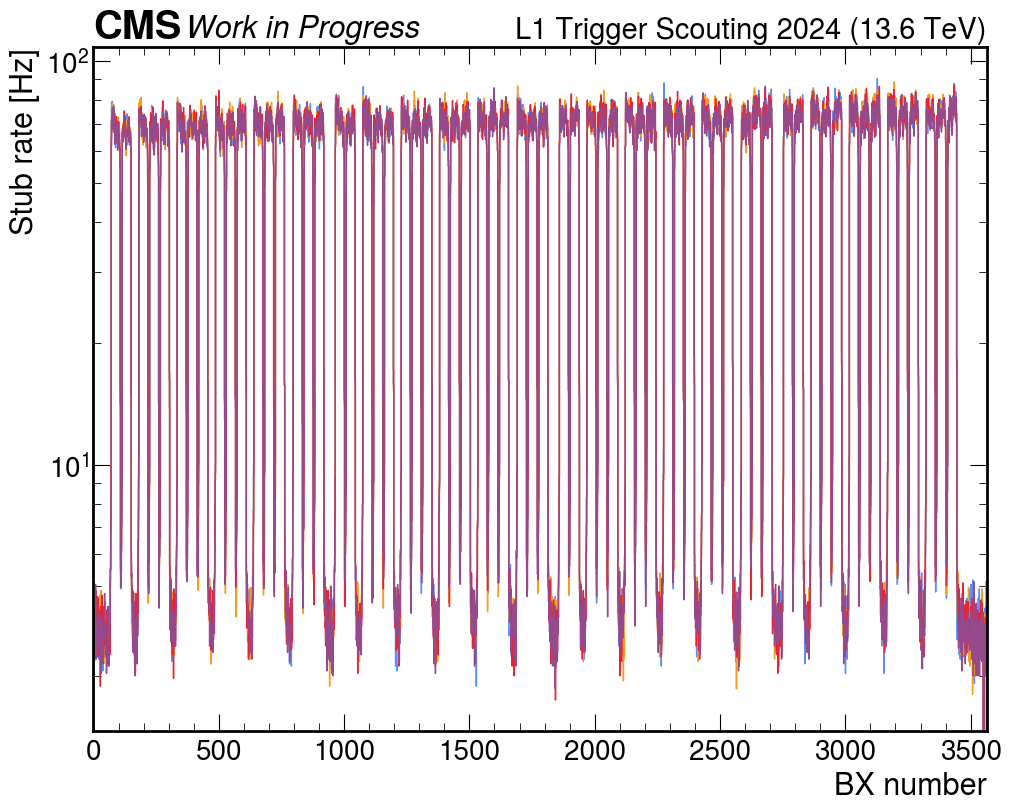

In [5]:
FileNumber = 0

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_stub_counts[FileNumber]), histtype='step', label="LS133")
ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_stub_counts[FileNumber + 1]), histtype='step', label="LS263")
ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_stub_counts[FileNumber + 2]), histtype='step', label="LS264")
ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_stub_counts[FileNumber + 3]), histtype='step', label="LS306")

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_yscale('log')
#ax.legend()


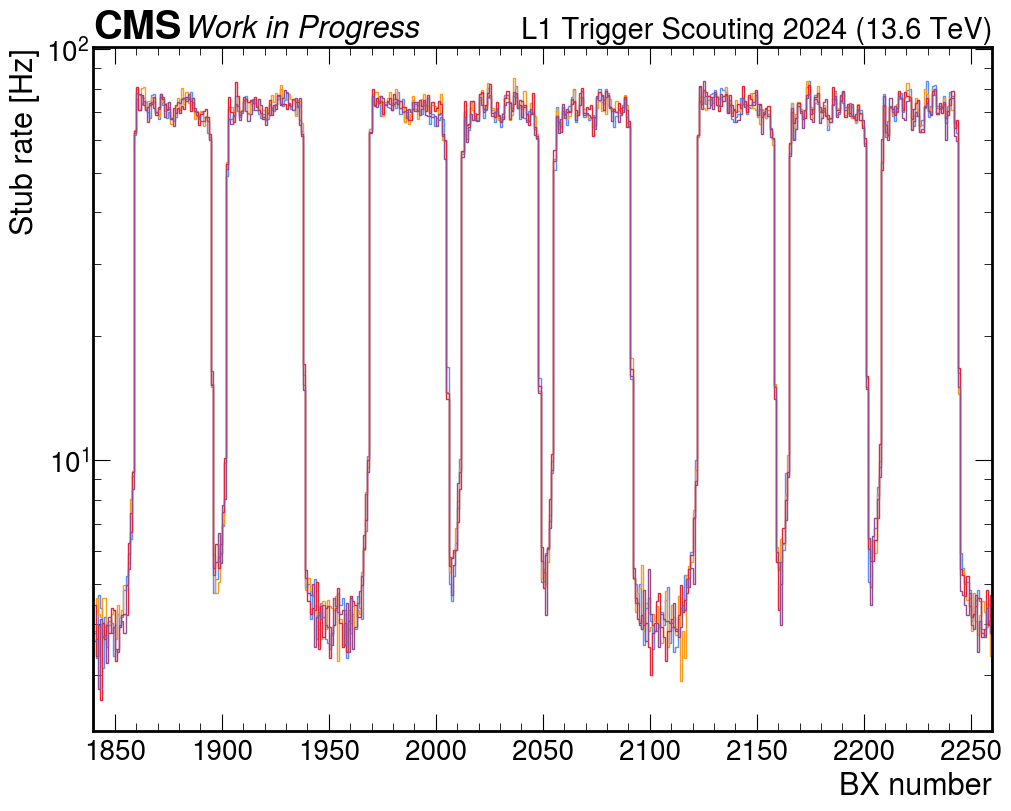

In [6]:
#Zoom in una regione con due treni (?)
FileNumber = 0

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

bx_left = 1840
bx_right = 2260

ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_stub_counts[FileNumber][bx_left:bx_right]), histtype='step')
ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_stub_counts[FileNumber + 1][bx_left:bx_right]), histtype='step')
ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_stub_counts[FileNumber + 2][bx_left:bx_right]), histtype='step')
ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_stub_counts[FileNumber + 3][bx_left:bx_right]), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(bx_left, bx_right)
ax.set_yscale('log')

### Con tutti e quattro i file assime:

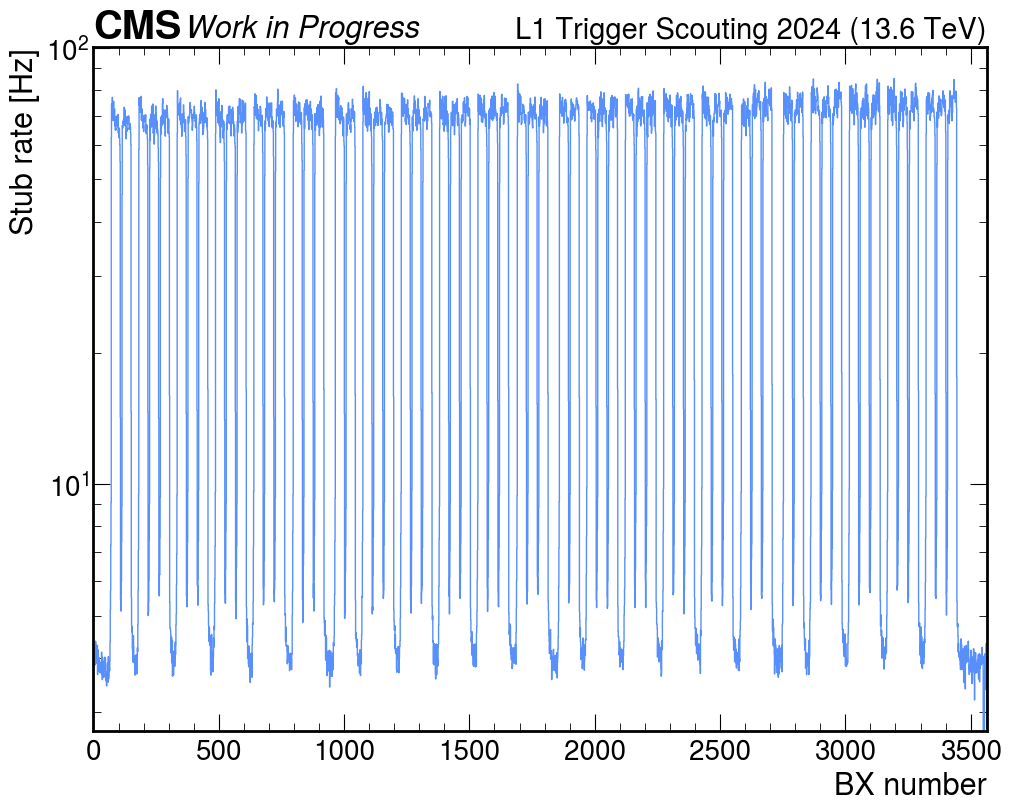

In [7]:
#Mettendo tutti i 4 set di dati indipendenti assieme:

bx_stub_counts_tot = (bx_stub_counts_LS133 + bx_stub_counts_LS263 + bx_stub_counts_LS264 + bx_stub_counts_LS306)/4

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_stub_counts_tot), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_yscale('log')

plt.savefig("../Immagini/StubsBXnumber.pdf")
plt.savefig("../Immagini/ImmaginiPNG/StubsBXnumber.png")

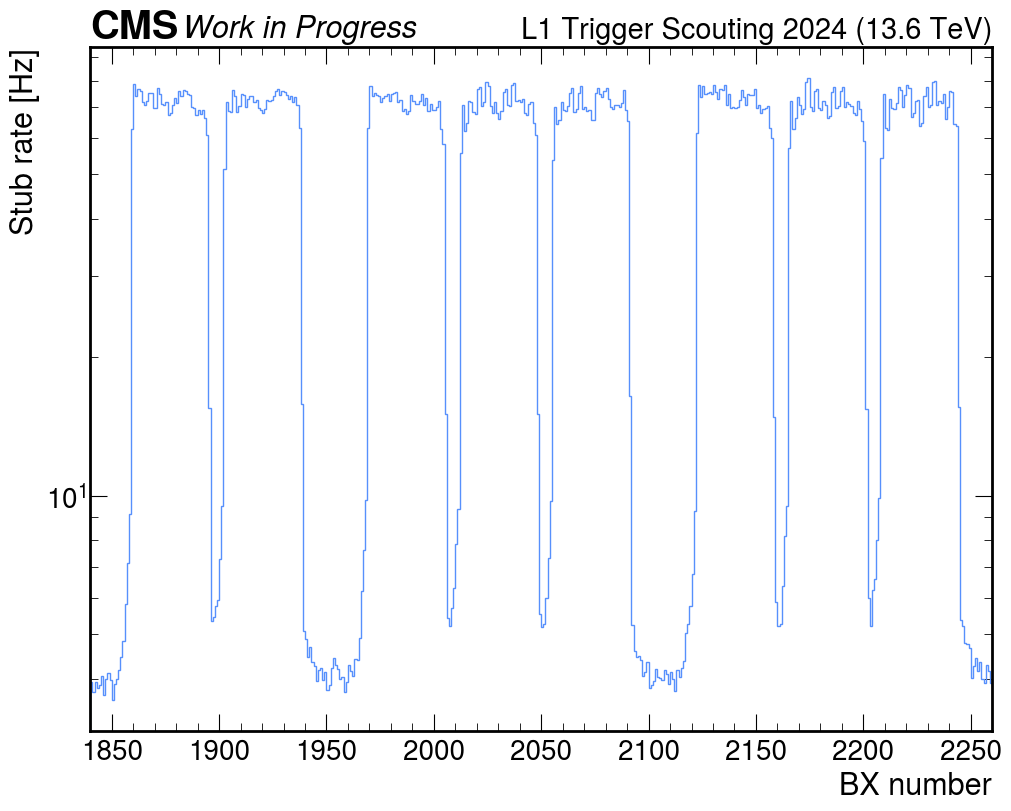

In [8]:
#Zoom in una regione con tutti i dati:

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

bx_left = 1840
bx_right = 2260

ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_stub_counts_tot[bx_left:bx_right]), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(bx_left, bx_right)
ax.set_yscale('log')

plt.savefig("../Immagini/StubsBXnumberZoom.pdf")
plt.savefig("../Immagini/ImmaginiPNG/StubsBXnumberZoom.png")

# Grafici Bidimensionali

Come prima, prima si passa a studiare singolarmente i quattro set di dati.

DOMANDA: Questo è un vettore perchè qualche muone ha attraversato sia la "wheel" i che la i+1??

A 'Wheel' è stato aggiunto "+ 2" per mappare i numeri negativi in numeri positivi. Allo stesso modo a 'Station' è stato tolto "- 1" 



In [9]:
#------------------------------------------LS133------------------------------------------#
StationLS133  = stubs_awk_LS133.stubStation - 1
SectorLS133   = stubs_awk_LS133.stubSector
WheelLS133    = stubs_awk_LS133.stubWheel + 2

#------------------------------------------LS263------------------------------------------#
StationLS263  = stubs_awk_LS263.stubStation - 1
SectorLS263   = stubs_awk_LS263.stubSector
WheelLS263    = stubs_awk_LS263.stubWheel + 2

#------------------------------------------LS264------------------------------------------#
StationLS264  = stubs_awk_LS264.stubStation - 1
SectorLS264   = stubs_awk_LS264.stubSector
WheelLS264    = stubs_awk_LS264.stubWheel + 2

#------------------------------------------LS306------------------------------------------#
StationLS306  = stubs_awk_LS306.stubStation - 1
SectorLS306   = stubs_awk_LS306.stubSector
WheelLS306    = stubs_awk_LS306.stubWheel + 2



In [10]:
#Il peso è posto ad 1, si potrebbe usare la quality?
WheelAndSectorLS133 = WeightedBiDimHist(5, 12, ak.flatten(WheelLS133), ak.flatten(SectorLS133), 1)
WheelAndSectorLS263 = WeightedBiDimHist(5, 12, ak.flatten(WheelLS263), ak.flatten(SectorLS263), 1)
WheelAndSectorLS264 = WeightedBiDimHist(5, 12, ak.flatten(WheelLS264), ak.flatten(SectorLS264), 1)
WheelAndSectorLS306 = WeightedBiDimHist(5, 12, ak.flatten(WheelLS306), ak.flatten(SectorLS306), 1)

StationAndWheelLS133 = WeightedBiDimHist(4, 5, ak.flatten(StationLS133), ak.flatten(WheelLS133), 1)
StationAndWheelLS263 = WeightedBiDimHist(4, 5, ak.flatten(StationLS263), ak.flatten(WheelLS263), 1)
StationAndWheelLS264 = WeightedBiDimHist(4, 5, ak.flatten(StationLS264), ak.flatten(WheelLS264), 1)
StationAndWheelLS306 = WeightedBiDimHist(4, 5, ak.flatten(StationLS306), ak.flatten(WheelLS306), 1)

In [11]:
WheelAndSector = ConvertToKHz(WheelAndSectorLS133 + WheelAndSectorLS263 + WheelAndSectorLS264 + WheelAndSectorLS306)
StationAndWheel = ConvertToKHz(StationAndWheelLS133 + StationAndWheelLS263 + StationAndWheelLS264 + StationAndWheelLS306)

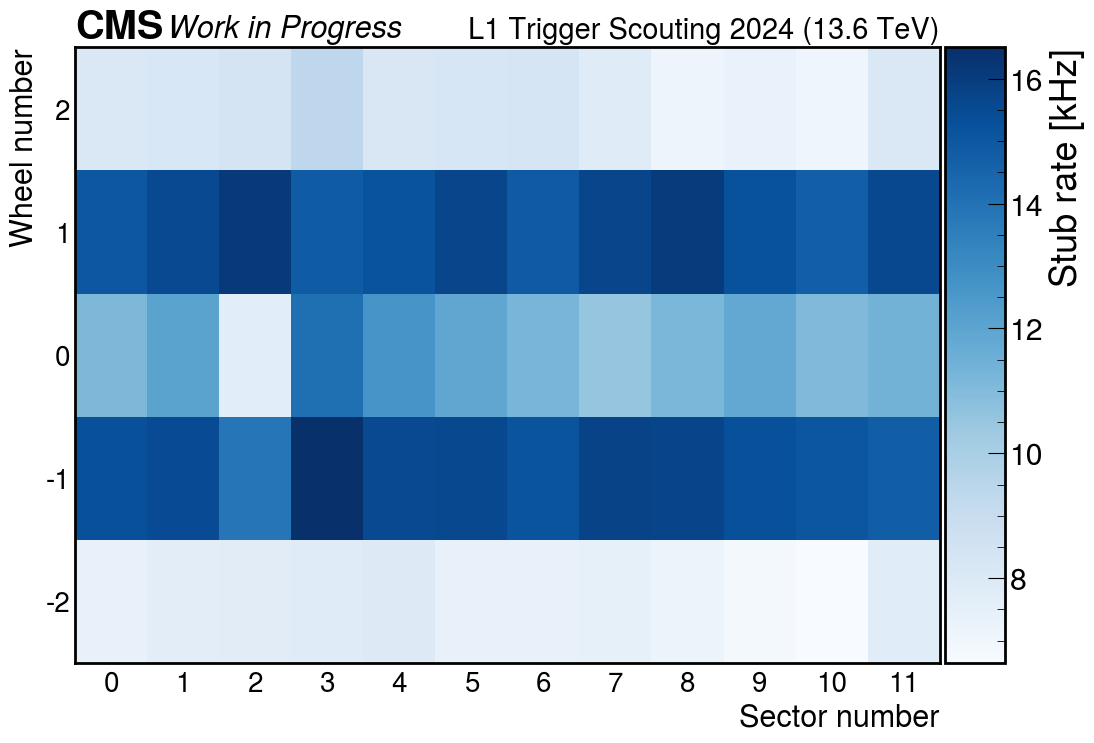

In [12]:
fig, ax = plt.subplots(figsize = (12, 8))

cax = ax.imshow(WheelAndSector, cmap='Blues', aspect='auto', interpolation='none', origin='lower')

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.set_yticks(ticks=np.arange(5), labels=np.arange(-2, 3, 1))
ax.set_xticks(ticks=np.arange(0, 12, 1), labels=np.arange(0, 12, 1))

divider = make_axes_locatable(ax)
cax2 = divider.append_axes("right", size="7%", pad=0.05) 
plt.colorbar(cax, cax=cax2, label='Stub rate [kHz]')

ax.set_xlabel('Sector number')
ax.set_ylabel('Wheel number')
ax.tick_params(axis='both', which='both', length=0)

plt.savefig("../Immagini/StubsWheelAndSector.pdf")
plt.savefig("../Immagini/ImmaginiPNG/StubsWheelAndSector.png")
plt.show()

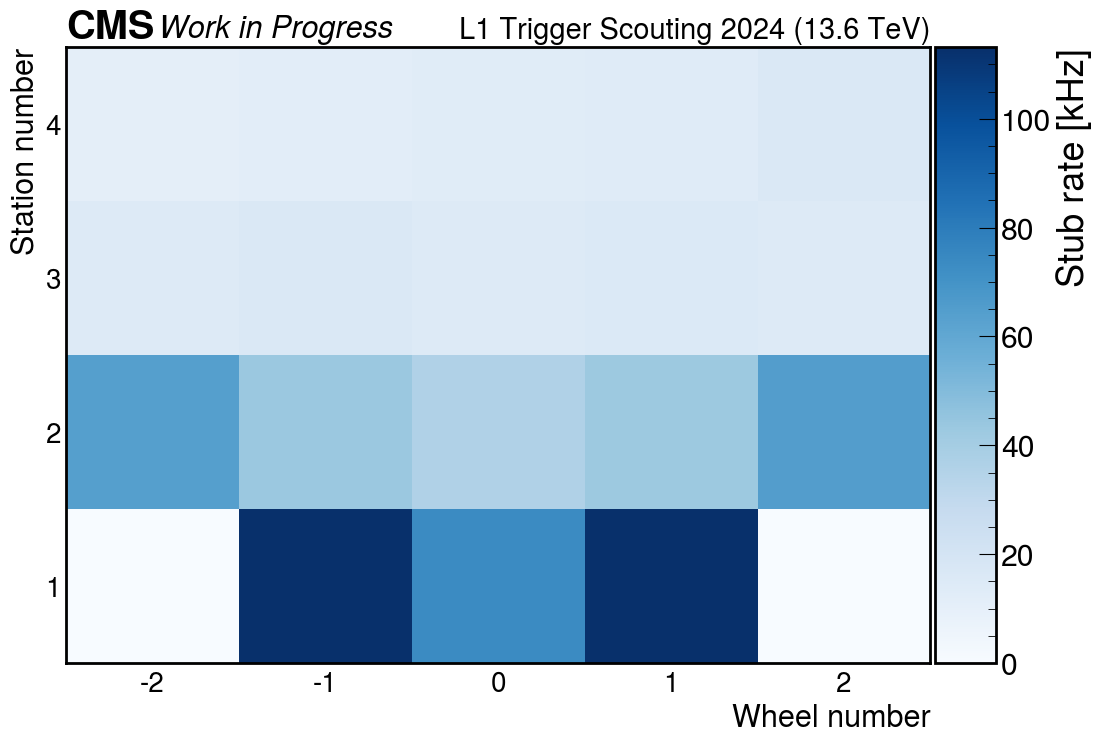

In [13]:
fig, ax = plt.subplots(figsize = (12, 8))

cax = ax.imshow(StationAndWheel, cmap='Blues', aspect='auto', interpolation='none', origin='lower')

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.set_yticks(ticks=np.arange(0, 4, 1), labels=np.arange(1, 5, 1))
ax.set_xticks(ticks=np.arange(5), labels=np.arange(-2, 3, 1))

divider = make_axes_locatable(ax)
cax2 = divider.append_axes("right", size="7%", pad=0.05) 
plt.colorbar(cax, cax=cax2, label='Stub rate [kHz]')

ax.set_xlabel('Wheel number')
ax.set_ylabel('Station number')
ax.tick_params(axis='both', which='both', length=0)

plt.savefig("../Immagini/StubsStationandWheel.pdf")
plt.savefig("../Immagini/ImmaginiPNG/StubsStationandWheel.png")
plt.show()

# Stubs per BX e per Orbit

RICONTROLLA PERCHE' NON PARTE DA ZERO!!

In [14]:
#Bincount di nStubs
nStubsLS133_count = ConvertToHz(np.bincount(nStubsLS133))
nStubsLS263_count = ConvertToHz(np.bincount(nStubsLS263))
nStubsLS264_count = ConvertToHz(np.bincount(nStubsLS264))
nStubsLS306_count = ConvertToHz(np.bincount(nStubsLS306))

nStubs_Array = ak.Array([nStubsLS133_count, nStubsLS263_count, nStubsLS264_count, nStubsLS306_count])

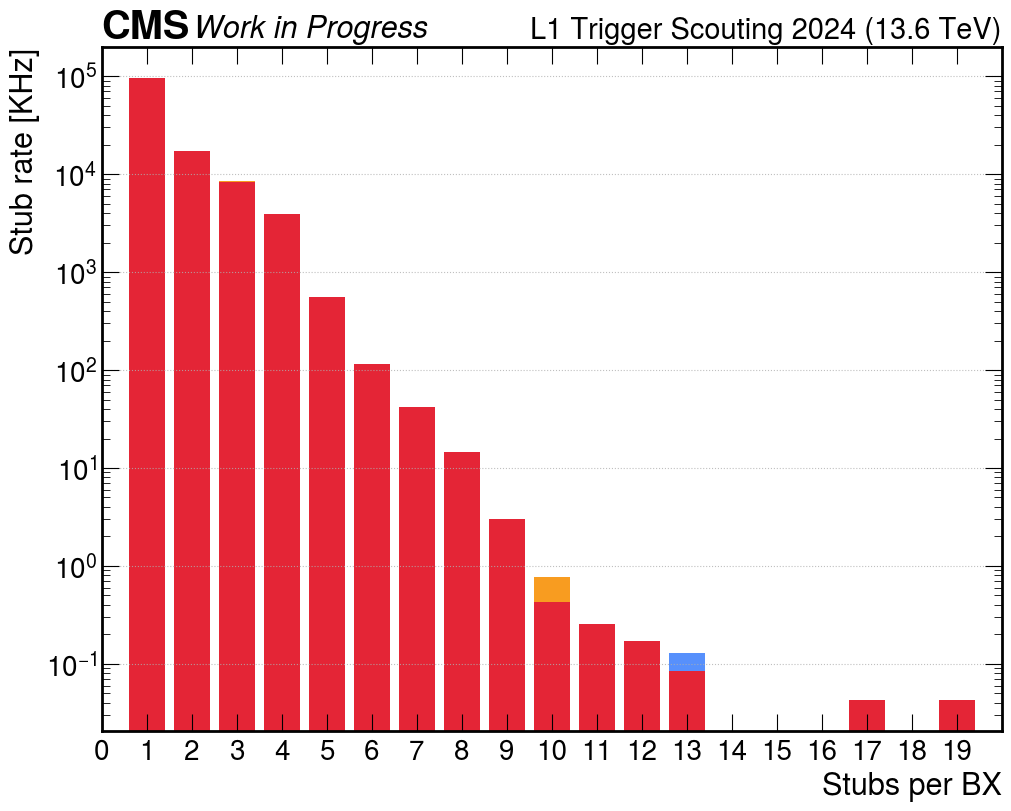

In [15]:
#Singoli Stubs Molteplicity per BX

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(np.arange(len(nStubs_Array[0])), nStubs_Array[0])
ax.bar(np.arange(len(nStubs_Array[1])), nStubs_Array[1])
ax.bar(np.arange(len(nStubs_Array[2])), nStubs_Array[2])
#ax.bar(np.arange(len(nStubs_Array[3])), nStubs_Array[3])

ax.set_xticks(ticks=np.arange(20), labels=np.arange(0, 20, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('Stubs per BX')
ax.set_ylabel('Stub rate [KHz]')
ax.set_xlim(0, 20)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

In [16]:
#Somma vettoriale di tutti i counts
MaxStubs = max(len(nStubs_Array[0]), len(nStubs_Array[1]), len(nStubs_Array[2]), len(nStubs_Array[3]))

#Filled Array per eseguire una somma vettoriale dei 4 array
FnStubsLS133 = ak.fill_none(ak.pad_none(nStubs_Array[0], MaxStubs, axis = 0, clip=True), 0)
FnStubsLS263 = ak.fill_none(ak.pad_none(nStubs_Array[1], MaxStubs, axis = 0, clip=True), 0)
FnStubsLS264 = ak.fill_none(ak.pad_none(nStubs_Array[2], MaxStubs, axis = 0, clip=True), 0)
FnStubsLS306 = ak.fill_none(ak.pad_none(nStubs_Array[3], MaxStubs, axis = 0, clip=True), 0)

nStubs = FnStubsLS133 + FnStubsLS263 + FnStubsLS264 + FnStubsLS306

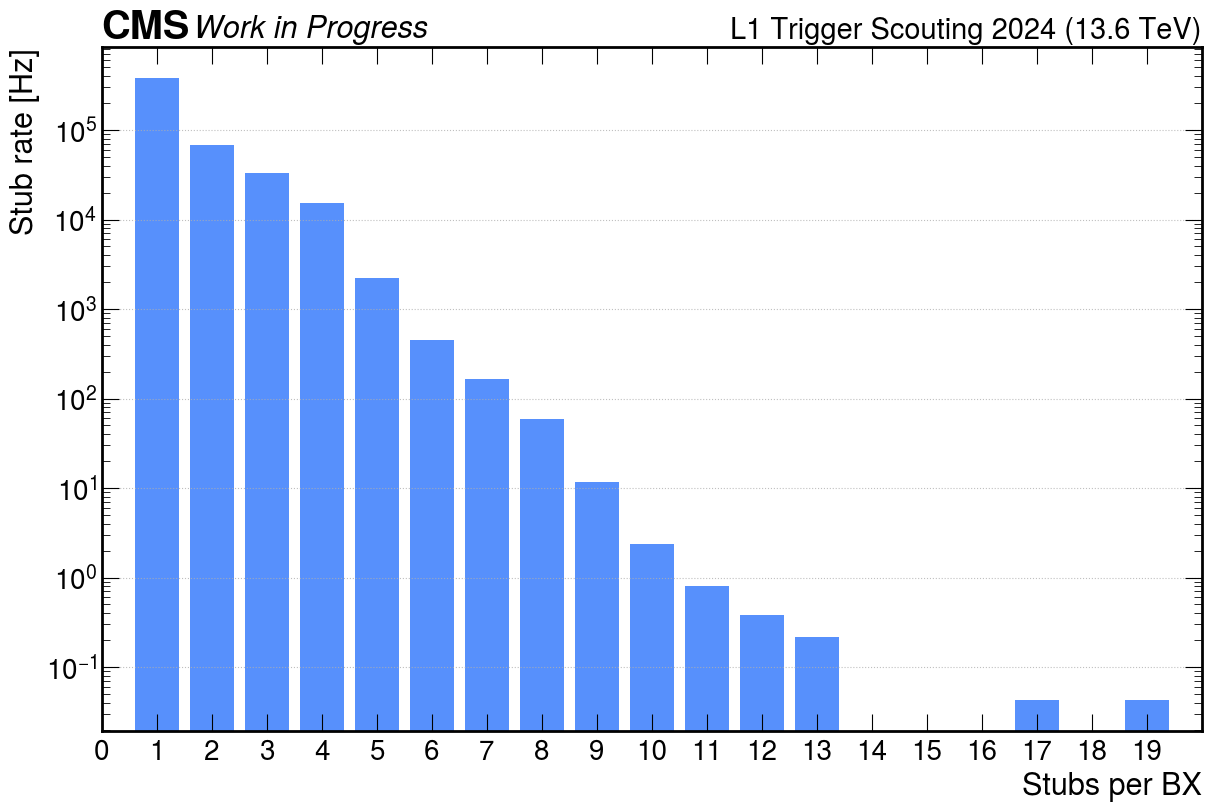

In [17]:
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(np.arange(len(nStubs)), nStubs)

ax.set_xticks(ticks=np.arange(20), labels=np.arange(0, 20, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('Stubs per BX')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(0, 20)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

plt.savefig("../Immagini/StubsMolteplicity.pdf")
plt.savefig("../Immagini/ImmaginiPNG/StubsMolteplicity.png")

In [18]:
#Stubs per orbit, (tempo di compilazione 4 minuti)

'''StubsPerOrbitLS133 = StubsPerOrbit(BX_LS133, nStubsLS133)
StubsPerOrbitLS263 = StubsPerOrbit(BX_LS263, nStubsLS263)
StubsPerOrbitLS264 = StubsPerOrbit(BX_LS264, nStubsLS264)
StubsPerOrbitLS306 = StubsPerOrbit(BX_LS306, nStubsLS306)'''

#D'ora in avanti il risultato di questa funzione è immagazzinato e pronto all'uso in "UtilityAndConst.py"

'StubsPerOrbitLS133 = StubsPerOrbit(BX_LS133, nStubsLS133)\nStubsPerOrbitLS263 = StubsPerOrbit(BX_LS263, nStubsLS263)\nStubsPerOrbitLS264 = StubsPerOrbit(BX_LS264, nStubsLS264)\nStubsPerOrbitLS306 = StubsPerOrbit(BX_LS306, nStubsLS306)'

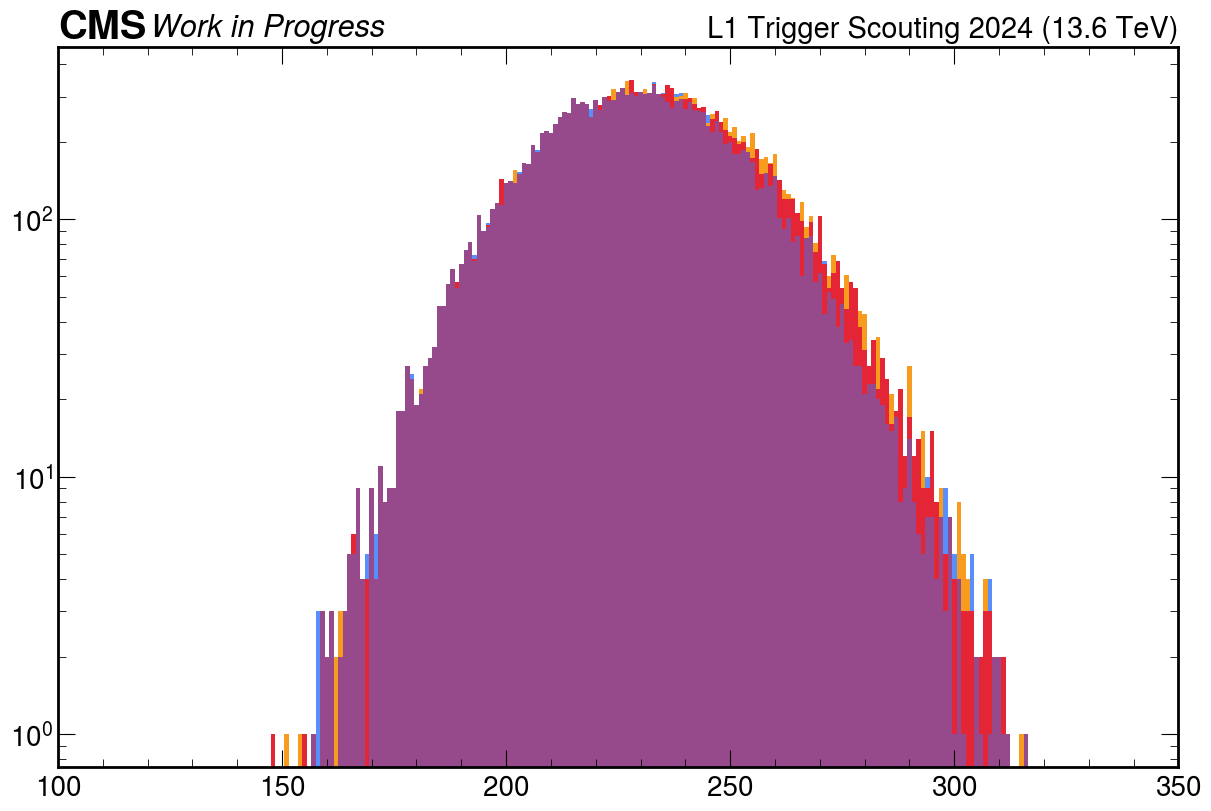

In [19]:
#Singoli LS per orbit

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(np.arange(1, len(StubsPerOrbitLS133) + 1), StubsPerOrbitLS133, width=1)
ax.bar(np.arange(1, len(StubsPerOrbitLS263) + 1), StubsPerOrbitLS263, width=1)
ax.bar(np.arange(1, len(StubsPerOrbitLS264) + 1), StubsPerOrbitLS264, width=1)
ax.bar(np.arange(1, len(StubsPerOrbitLS306) + 1), StubsPerOrbitLS306, width=1)

#ax.hist(StubsPerOrbit, bins = 80, )#histtype='step')
ax.set_xlim(100, 350)
ax.set_yscale('log')

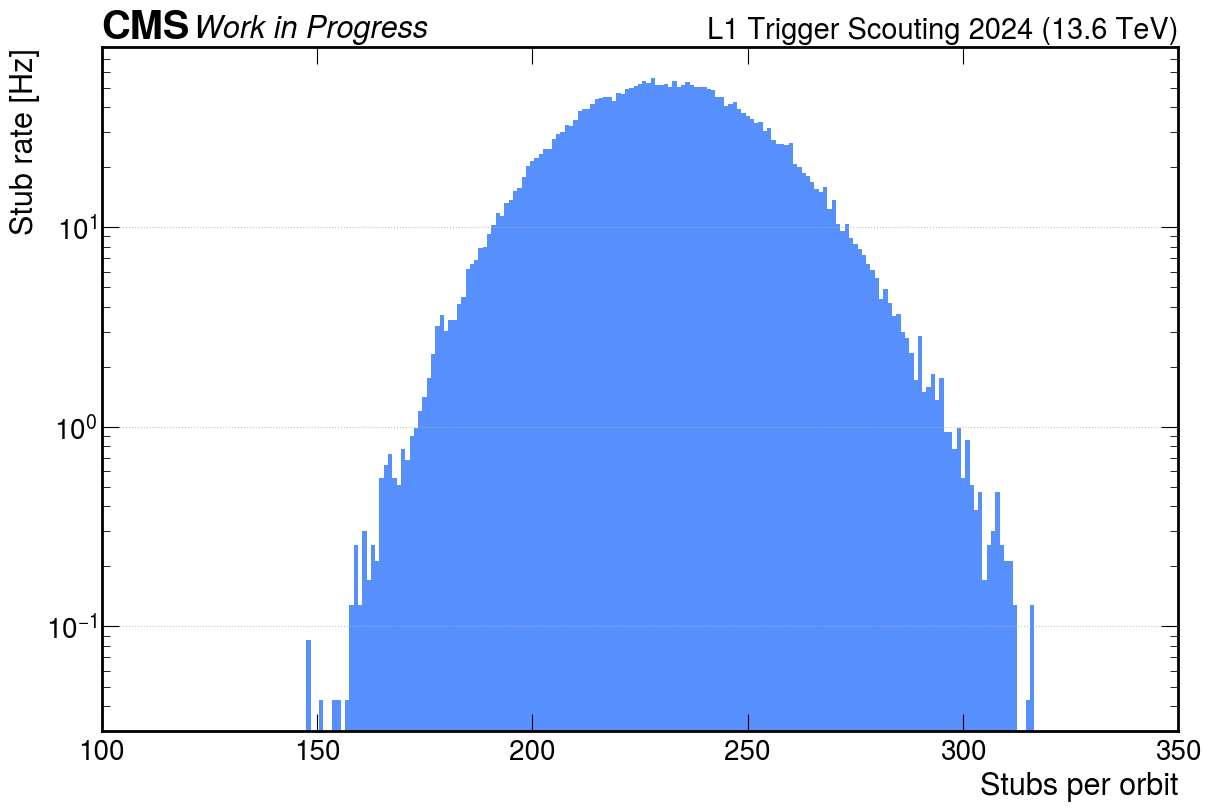

In [20]:
StubsPerOrbit = ConvertToHz(StubsPerOrbitLS133 + StubsPerOrbitLS263 + StubsPerOrbitLS264 + StubsPerOrbitLS306)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(np.arange(1, len(StubsPerOrbit) + 1), StubsPerOrbit, width=1)


#ax.set_xticks(ticks=np.arange(20), labels=np.arange(0, 20, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('Stubs per orbit')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(100, 350)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

plt.savefig("../Immagini/StubsPerOrbit.pdf")
plt.savefig("../Immagini/ImmaginiPNG/StubsPerOrbit.png")

# Grafici ulteriori

In [21]:
#Caricamento Phi
#Si potrebbe usare anche ak.raven, che esegue lo stesso trattamento di ak.flatten senza però specificare l'asse
stubHwPhiLS133 = ak.flatten(stubs_awk_LS133.stubHwPhi, axis = None)
stubHwPhiLS263 = ak.flatten(stubs_awk_LS263.stubHwPhi, axis = None)
stubHwPhiLS264 = ak.flatten(stubs_awk_LS264.stubHwPhi, axis = None)
stubHwPhiLS306 = ak.flatten(stubs_awk_LS306.stubHwPhi, axis = None)

In [22]:
#Distribuzione degli angoli in funzione del sector (tempo di compilazione: 6min)
#Mi aspetto che, essendo in questo caso l'angolo locale per ogni sector, la distribuzione sia la stessa per ogni sector
'''
PhiDistributionLS133 = PhiPerSector(stubHwPhiLS133, ak.flatten(SectorLS133))
PhiDistributionLS263 = PhiPerSector(stubHwPhiLS263, ak.flatten(SectorLS263))
PhiDistributionLS264 = PhiPerSector(stubHwPhiLS264, ak.flatten(SectorLS264))
PhiDistributionLS306 = PhiPerSector(stubHwPhiLS306, ak.flatten(SectorLS306))

ak.to_parquet(PhiDistributionLS133, 'PhiDistributionLS133.parquet')
ak.to_parquet(PhiDistributionLS263, 'PhiDistributionLS263.parquet')
ak.to_parquet(PhiDistributionLS264, 'PhiDistributionLS264.parquet')
ak.to_parquet(PhiDistributionLS306, 'PhiDistributionLS306.parquet')'''

"\nPhiDistributionLS133 = PhiPerSector(stubHwPhiLS133, ak.flatten(SectorLS133))\nPhiDistributionLS263 = PhiPerSector(stubHwPhiLS263, ak.flatten(SectorLS263))\nPhiDistributionLS264 = PhiPerSector(stubHwPhiLS264, ak.flatten(SectorLS264))\nPhiDistributionLS306 = PhiPerSector(stubHwPhiLS306, ak.flatten(SectorLS306))\n\nak.to_parquet(PhiDistributionLS133, 'PhiDistributionLS133.parquet')\nak.to_parquet(PhiDistributionLS263, 'PhiDistributionLS263.parquet')\nak.to_parquet(PhiDistributionLS264, 'PhiDistributionLS264.parquet')\nak.to_parquet(PhiDistributionLS306, 'PhiDistributionLS306.parquet')"

In [23]:
PhiDistribution = [[] for _ in range(12)]

for i in range(12):
  PhiDistribution[i] = ak.concatenate([PhiDistributionLS133[i], PhiDistributionLS263[i], PhiDistributionLS264[i], PhiDistributionLS306[i]])

<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_29804/661669203.py:14: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('$\phi$ (HW)')


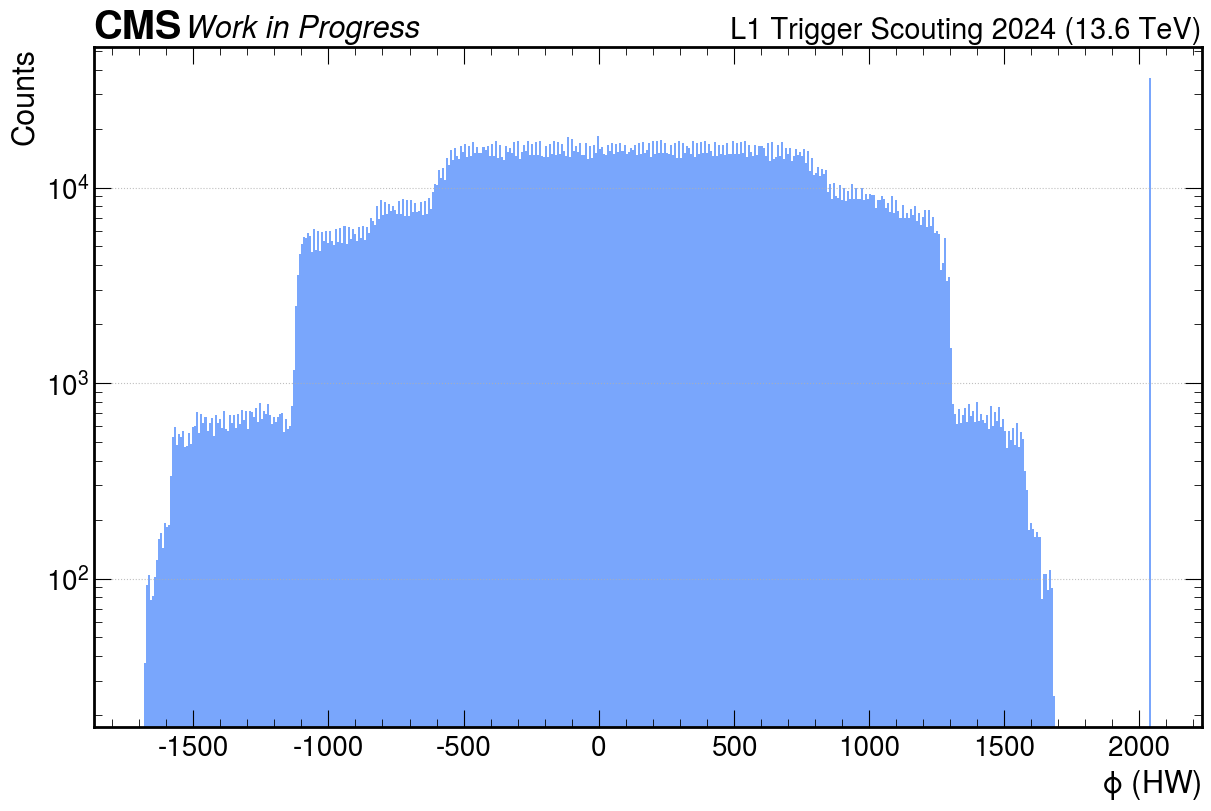

In [31]:
a = 10
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")


ax.hist(stubHwPhiLS133, bins = 500, alpha=0.8)
#ax.hist(PhiDistribution[0], bins=500, alpha=0.8)

#ax.set_xticks(ticks=np.arange(20), labels=np.arange(0, 20, 1))
#ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('$\phi$ (HW)')
ax.set_ylabel('Counts')
#ax.set_xlim(2000, 2048)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

plt.savefig("../Immagini/PhiDistribution.pdf")
plt.savefig("../Immagini/ImmaginiPNG/PhiDistribution.png")

## Distribuzione angolare dell'angolo di bending

$\phi_b$ è una quantità locale ad ogni station di ogni sector o è globale?

In [25]:
#Caricamento PhiB, angolo di bending
stubHwPhiBLS133 = ak.flatten(stubs_awk_LS133.stubHwPhiB, axis = None)
stubHwPhiBLS263 = ak.flatten(stubs_awk_LS263.stubHwPhiB, axis = None)
stubHwPhiBLS264 = ak.flatten(stubs_awk_LS264.stubHwPhiB, axis = None)
stubHwPhiBLS306 = ak.flatten(stubs_awk_LS306.stubHwPhiB, axis = None)

HwPhiB = ak.concatenate([stubHwPhiBLS133, stubHwPhiBLS263, stubHwPhiBLS264, stubHwPhiBLS306])

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_29804/1213927345.py:12: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('$\phi_B$ (HW)')


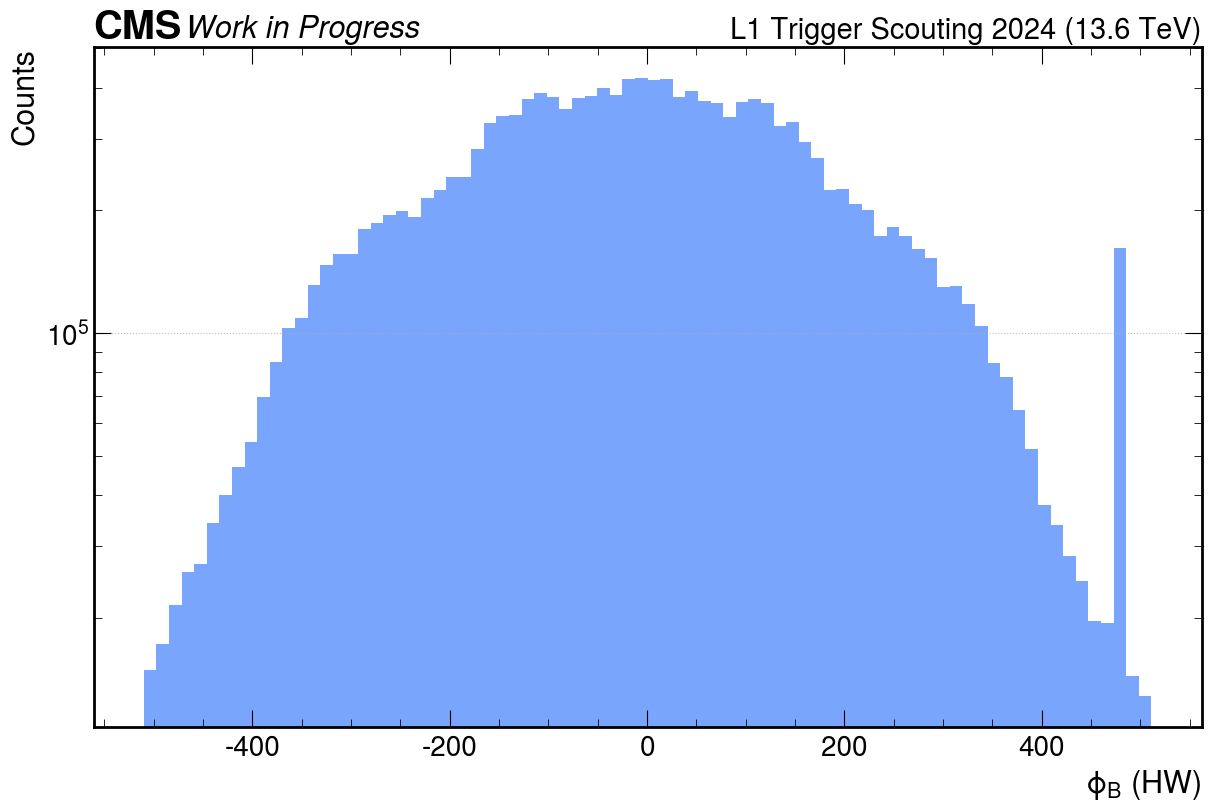

In [30]:
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")


ax.hist(HwPhiB, bins = 80, alpha=0.8)
#ax.hist(stubHwPhiBLS133, bins = 200, alpha=0.5)


ax.set_xlabel('$\phi_B$ (HW)')
ax.set_ylabel('Counts')
#ax.set_xlim(-1800, 1800)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

plt.savefig("../Immagini/StubsPhiBending.pdf")
plt.savefig("../Immagini/ImmaginiPNG/StubsPhiBending.png")

# Quality 

Questo è un numero da 0 a 7 e corrisponde al numero di superlayer che sono stati usati per costruire la stub

In [27]:
stubsHwQualLS133 = stubs_awk_LS133.stubHwQual
stubsHwQualLS263 = stubs_awk_LS263.stubHwQual
stubsHwQualLS264 = stubs_awk_LS264.stubHwQual
stubsHwQualLS306 = stubs_awk_LS306.stubHwQual

HwQual = ak.concatenate([ak.flatten(stubsHwQualLS133), ak.flatten(stubsHwQualLS263), ak.flatten(stubsHwQualLS264), ak.flatten(stubsHwQualLS306)])

print(HwQual)

[2, 6, 3, 5, 6, 3, 2, 2, 6, 3, 6, 5, 5, ..., 5, 3, 6, 6, 3, 3, 2, 3, 2, 5, 6, 5]


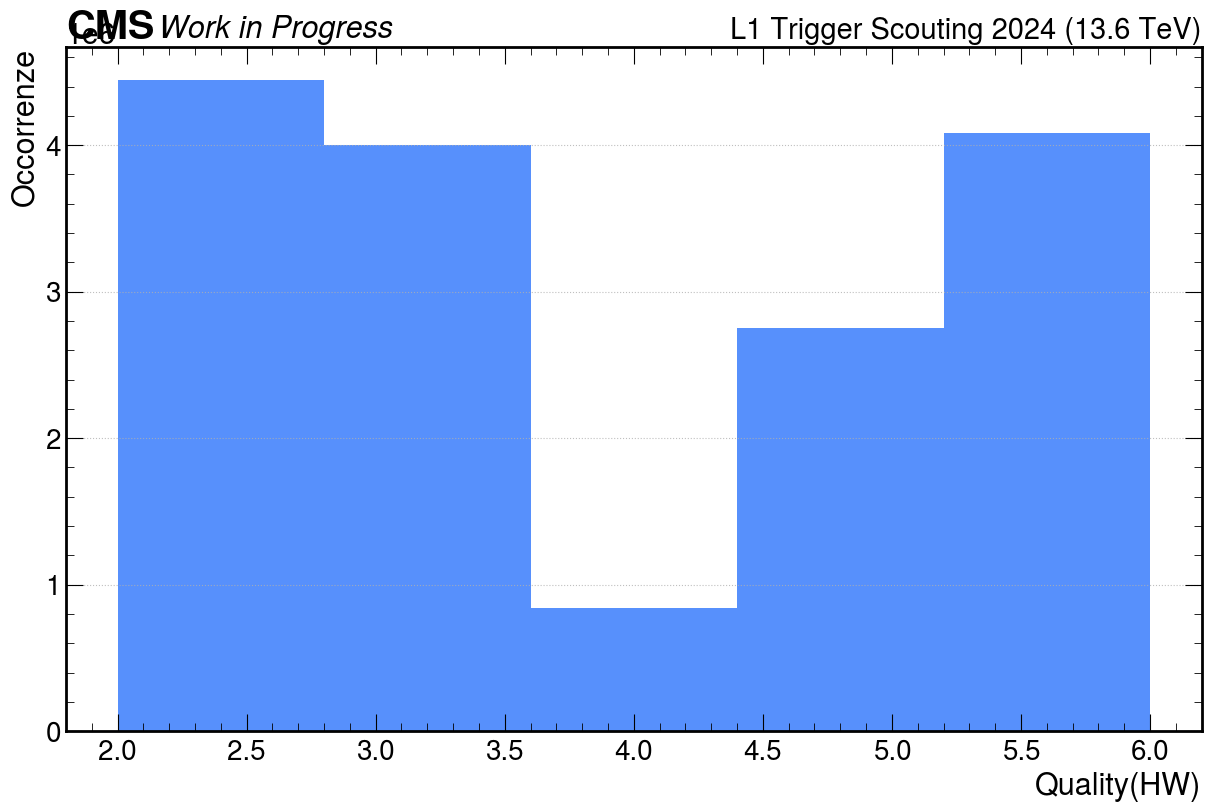

In [28]:
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")


#ax.bar(np.arange(7), np.bincount(HwQual))
ax.hist(HwQual, bins=5)

ax.set_xlabel('Quality(HW)')
ax.set_ylabel('Occorrenze')
#ax.set_xlim(-1800, 1800)
ax.grid(visible=True, axis='y')
#ax.set_yscale('log')